<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98%EC%99%80_%EB%B2%94%EC%A3%84%EC%9C%A8_%EA%BA%BE%EC%9D%80%EC%84%A0_%EA%B7%B8%EB%9E%98%ED%94%84_%EC%8B%9C%EA%B0%81%ED%99%94(2016_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 상관분석과 회귀분석을 사용하여 분석해보기
# 변수들이 서로 관련성을 가지고 변화하는가를 찾아보고자 한다.
# 선형적 관계 - 상관, 이러한 관계에 대한 분석 - 상관분석

# 우선 행복지수와 범죄율을 한 시각데이터로 보기 위해 막대그래프와 꺾은선 그래프를 겹쳐 그려보도록 한다.


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [4]:
happiness = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/서울 시민 행복지수(구분별)_2016-2020.csv", encoding='cp949')
happiness

,division,2016,2017,2018,2019,2020
0,가정생활,7.020,7.237,7.128,6.886,6.591
1,사회생활,6.895,7.068,6.900,6.749,6.362
2,자신의 건강상태,6.997,7.189,7.240,7.199,6.926
3,자신의 재정상태,6.127,6.243,6.171,6.192,5.874
4,"주위 친지, 친구와의 관계",6.933,7.166,7.211,6.867,6.573


In [5]:
crime = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2016-2020 서울시 범죄발생현황(전쳬).csv", encoding='cp949')
crime

,division,2016,2017,2018,2019,2020
0,살인 전체,288,278,266,252,265
1,강도 전체,543,343,296,279,283
2,"강간, 강제추행 전체",2627,2708,2801,2928,3062
3,절도 전체,93655,82270,78295,84325,76487
4,폭력 전체,72730,67135,63263,61624,54313


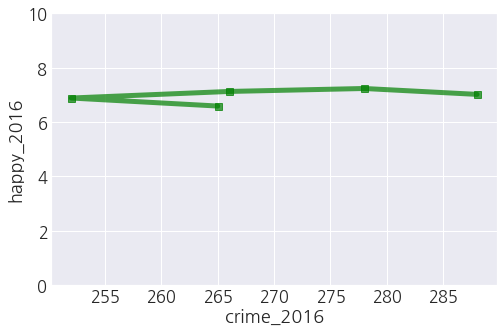

In [6]:
x = np.arange(2016, 2020)
crime_2016 = np.array([288, 278, 266, 252, 265])
happy_2016 = np.array([7.020, 7.237, 7.128, 6.886, 6.591])

fig, ax1 = plt.subplots()

ax1.plot(crime_2016, happy_2016, '-s', color='green', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 10)
ax1.set_xlabel('crime_2016')
ax1.set_ylabel('happy_2016')
ax1.tick_params(axis='both', direction='in')

# ax2 = ax1.twinx()
# ax2.bar(crime_2016, happy_2016, color='deeppink', label='Demand', alpha=0.7, width=0.7)
# ax2.set_ylim(0, 18)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
# ax2.tick_params(axis='y', direction='in')

plt.show()

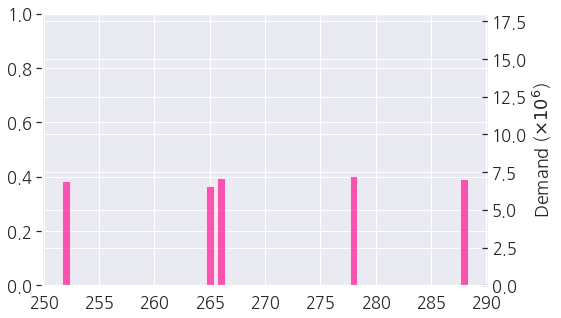

In [7]:
x = np.arange(2016, 2020)
crime_2016 = np.array([288, 278, 266, 252, 265])
happy_2016 = np.array([7.020, 7.237, 7.128, 6.886, 6.591])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.bar(crime_2016, happy_2016, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()

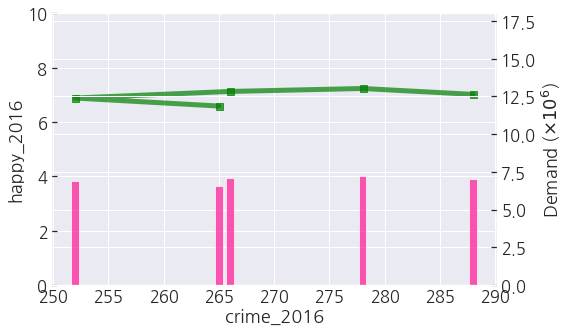

In [8]:
x = np.arange(2016, 2020)
crime_2016 = np.array([288, 278, 266, 252, 265])
happy_2016 = np.array([7.020, 7.237, 7.128, 6.886, 6.591])

fig, ax1 = plt.subplots()

ax1.plot(crime_2016, happy_2016, '-s', color='green', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 10)
ax1.set_xlabel('crime_2016')
ax1.set_ylabel('happy_2016')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(crime_2016, happy_2016, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()

In [9]:
np.random.seed(123)
idx = pd.date_range("10 1 2021", periods=10, freq="d", name="Date") 
y1 = np.arange(10) + np.random.normal(0, 1, 10) 
y2 = np.exp(range(10)) 
df = pd.DataFrame({'y1': y1, 'y2': y2}, index = idx) 

print(df)

                  y1           y2
Date                             
2021-10-01 -1.085631     1.000000
2021-10-02  1.997345     2.718282
2021-10-03  2.282978     7.389056
2021-10-04  1.493705    20.085537
2021-10-05  3.421400    54.598150
2021-10-06  6.651437   148.413159
2021-10-07  3.573321   403.428793
2021-10-08  6.571087  1096.633158
2021-10-09  9.265936  2980.957987
2021-10-10  8.133260  8103.083928


In [10]:
df

,y1,y2
Date,,
2021-10-01,-1.085631,1.000000
2021-10-02,1.997345,2.718282
2021-10-03,2.282978,7.389056
2021-10-04,1.493705,20.085537
2021-10-05,3.421400,54.598150
2021-10-06,6.651437,148.413159
2021-10-07,3.573321,403.428793
2021-10-08,6.571087,1096.633158
2021-10-09,9.265936,2980.957987


In [11]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2016-2020 서울시 행복지수, 범죄발생건수.csv")
df

,year,happiness_exponent_mean,home_life,social_life,health_condition,financial_condition,close_friend_relationship,murder_all,heist_all,rape_all,burglary_all,violence_all
0,2016,6.7944,7.020,6.895,6.997,6.127,6.933,288,543,2627,93655,72730
1,2017,6.9806,7.237,7.068,7.189,6.243,7.166,278,343,2708,82270,67135
2,2018,6.9300,7.128,6.900,7.240,6.171,7.211,266,296,2801,78295,63263
3,2019,6.7786,6.886,6.749,7.199,6.192,6.867,252,279,2928,84325,61624
4,2020,6.4652,6.591,6.362,6.926,5.874,6.573,265,283,3062,76487,54313


In [12]:
print(df)

   year  happiness_exponent_mean  home_life  social_life  health_condition  \
0  2016                   6.7944      7.020        6.895             6.997   
1  2017                   6.9806      7.237        7.068             7.189   
2  2018                   6.9300      7.128        6.900             7.240   
3  2019                   6.7786      6.886        6.749             7.199   
4  2020                   6.4652      6.591        6.362             6.926   

   financial_condition  close_friend_relationship  murder_all  heist_all  \
0                6.127                      6.933         288        543   
1                6.243                      7.166         278        343   
2                6.171                      7.211         266        296   
3                6.192                      6.867         252        279   
4                5.874                      6.573         265        283   

   rape_all  burglary_all  violence_all  
0      2627         93655       

In [13]:
df = df.set_index(['year'])
df

,happiness_exponent_mean,home_life,social_life,health_condition,financial_condition,close_friend_relationship,murder_all,heist_all,rape_all,burglary_all,violence_all
year,,,,,,,,,,,
2016,6.7944,7.020,6.895,6.997,6.127,6.933,288,543,2627,93655,72730
2017,6.9806,7.237,7.068,7.189,6.243,7.166,278,343,2708,82270,67135
2018,6.9300,7.128,6.900,7.240,6.171,7.211,266,296,2801,78295,63263
2019,6.7786,6.886,6.749,7.199,6.192,6.867,252,279,2928,84325,61624
2020,6.4652,6.591,6.362,6.926,5.874,6.573,265,283,3062,76487,54313


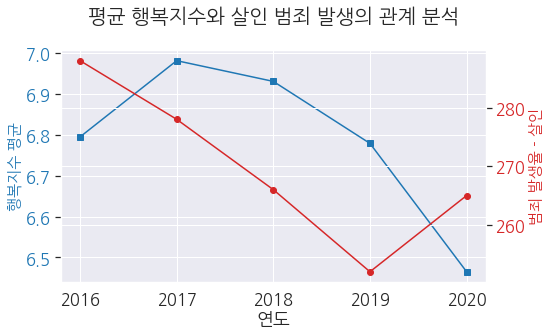

In [14]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('평균 행복지수와 살인 범죄 발생의 관계 분석\n', fontsize=20) 
ax1.set_xlabel('연도') 
ax1.set_ylabel('행복지수 평균', fontsize=15, color=color_1) 
ax1.plot(df.index, df.happiness_exponent_mean, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx() 
color_2 = 'tab:red' 
ax2.set_ylabel('범죄 발생율 - 살인', fontsize=15, color=color_2) 
ax2.plot(df.index, df.murder_all, marker='o', color=color_2) 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout()
plt.show()

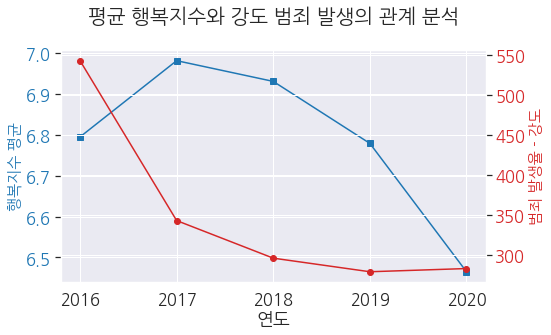

In [15]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('평균 행복지수와 강도 범죄 발생의 관계 분석\n', fontsize=20) 
ax1.set_xlabel('연도') 
ax1.set_ylabel('행복지수 평균', fontsize=15, color=color_1) 
ax1.plot(df.index, df.happiness_exponent_mean, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx() 
color_2 = 'tab:red' 
ax2.set_ylabel('범죄 발생율 - 강도', fontsize=15, color=color_2) 
ax2.plot(df.index, df.heist_all, marker='o', color=color_2) 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout()
plt.show()

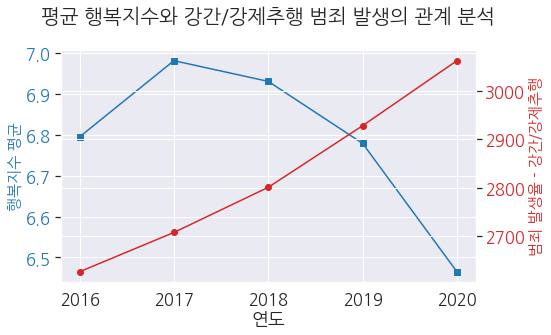

In [16]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('평균 행복지수와 강간/강제추행 범죄 발생의 관계 분석\n', fontsize=20) 
ax1.set_xlabel('연도') 
ax1.set_ylabel('행복지수 평균', fontsize=15, color=color_1) 
ax1.plot(df.index, df.happiness_exponent_mean, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx() 
color_2 = 'tab:red' 
ax2.set_ylabel('범죄 발생율 - 강간/강제추행', fontsize=15, color=color_2) 
ax2.plot(df.index, df.rape_all, marker='o', color=color_2) 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout()
plt.show()

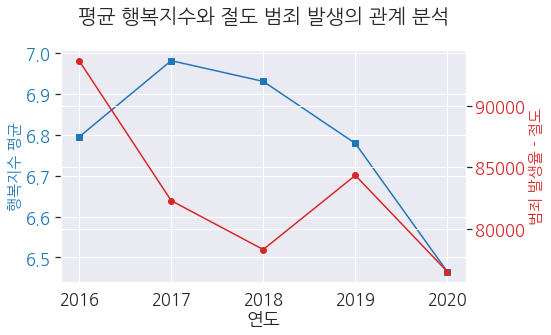

In [17]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('평균 행복지수와 절도 범죄 발생의 관계 분석\n', fontsize=20) 
ax1.set_xlabel('연도') 
ax1.set_ylabel('행복지수 평균', fontsize=15, color=color_1) 
ax1.plot(df.index, df.happiness_exponent_mean, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx() 
color_2 = 'tab:red' 
ax2.set_ylabel('범죄 발생율 - 절도', fontsize=15, color=color_2) 
ax2.plot(df.index, df.burglary_all, marker='o', color=color_2) 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout()
plt.show()

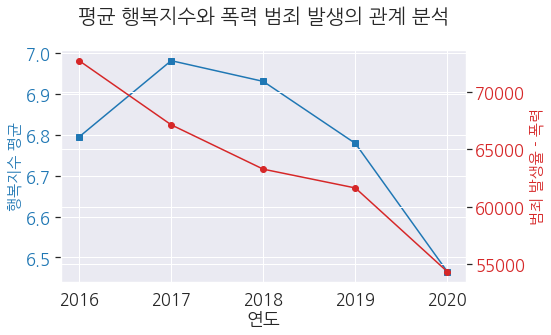

In [19]:
fig, ax1 = plt.subplots() 
color_1 = 'tab:blue' 
ax1.set_title('평균 행복지수와 폭력 범죄 발생의 관계 분석\n', fontsize=20) 
ax1.set_xlabel('연도') 
ax1.set_ylabel('행복지수 평균', fontsize=15, color=color_1) 
ax1.plot(df.index, df.happiness_exponent_mean, marker='s', color=color_1) 
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx() 
color_2 = 'tab:red' 
ax2.set_ylabel('범죄 발생율 - 폭력', fontsize=15, color=color_2) 
ax2.plot(df.index, df.violence_all, marker='o', color=color_2) 
ax2.tick_params(axis='y', labelcolor=color_2) 
fig.tight_layout()
plt.show()